In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [2]:
! pip install pyspark

     |████████████████████████████████| 212.4MB 62kB/s 
     |████████████████████████████████| 204kB 17.8MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=123030a299c50e58b6bca59dfee8271a9f26f7877d620cd1b74321189a3ec83f
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [3]:
import findspark
findspark.init()

In [4]:
findspark.find()

'/content/spark-3.0.0-bin-hadoop3.2'

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [106]:
# Load the data file into a Spark DataFrame
df = spark.read.format("csv").option("header", "true").option("nullValue","N/A").option("inferSchema", "true").load("DatafinitiElectronicsProductsPricingData.csv")
df.show(5)

+--------------------+----------------+----------------+-------------------+----------------+---------------+--------------------+-------------+---------------+---------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+----+--------------------+--------------------+------------+------------------+--------------------+-----------------+--------------------+-----------+-----------+----+----+----+----+----+
|                  id|prices.amountMax|prices.amountMin|prices.availability|prices.condition|prices.currency|     prices.dateSeen|prices.isSale|prices.merchant|prices.shipping|   prices.sourceURLs|               asins|  brand|          categories|           dateAdded|         dateUpdated| ean|           imageURLs|                keys|manufacturer|manufacturerNumber|                name|primaryCategories|          sourceURLs|        upc|     weight|_c26|_c27|_c28|_c29|_c30|
+--------------------+----------------+-----

In [107]:
df.columns

['id',
 'prices.amountMax',
 'prices.amountMin',
 'prices.availability',
 'prices.condition',
 'prices.currency',
 'prices.dateSeen',
 'prices.isSale',
 'prices.merchant',
 'prices.shipping',
 'prices.sourceURLs',
 'asins',
 'brand',
 'categories',
 'dateAdded',
 'dateUpdated',
 'ean',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'name',
 'primaryCategories',
 'sourceURLs',
 'upc',
 'weight',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30']

In [108]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- prices.amountMax: double (nullable = true)
 |-- prices.amountMin: double (nullable = true)
 |-- prices.availability: string (nullable = true)
 |-- prices.condition: string (nullable = true)
 |-- prices.currency: string (nullable = true)
 |-- prices.dateSeen: string (nullable = true)
 |-- prices.isSale: string (nullable = true)
 |-- prices.merchant: string (nullable = true)
 |-- prices.shipping: string (nullable = true)
 |-- prices.sourceURLs: string (nullable = true)
 |-- asins: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- dateAdded: string (nullable = true)
 |-- dateUpdated: string (nullable = true)
 |-- ean: string (nullable = true)
 |-- imageURLs: string (nullable = true)
 |-- keys: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- manufacturerNumber: string (nullable = true)
 |-- name: string (nullable = true)
 |-- primaryCategories: string (nullable =

In [109]:
# No of rows present in the dataframe before removing null values
df.count()

14592

In [110]:
# checking the duplicates record in the dataframe
df=df.dropDuplicates()
df.count()

14579

In [111]:
# Renaming the columns
df=df.withColumnRenamed("prices.amountMax", "amountMax") \
     .withColumnRenamed("prices.amountMin", "amountMin") \
     .withColumnRenamed("prices.availability", "availability") \
     .withColumnRenamed("prices.condition", "condition") \
     .withColumnRenamed("prices.currency", "currency") \
     .withColumnRenamed("prices.dateSeen", "dateSeen") \
     .withColumnRenamed("prices.isSale", "isSale") \
     .withColumnRenamed("prices.merchant", "merchant") \
     .withColumnRenamed("prices.shipping", "shipping") \
     .withColumnRenamed("prices.sourceURLs", "source")

In [112]:
df=df.drop('id','_c26','_c27','_c28','_c29','_c30','ean','keys','manufacturerNumber','shipping','sourceURLs','upc',
           'imageURLs','currency')

In [113]:
# checking percentage of missing values in each column
total_record=df.count()
for col in df.columns:
  null_column=(df.filter(df[col].isNull())).count()
  percent_null=null_column/total_record
  print(col, ' with null values ', percent_null)

amountMax  with null values  0.0
amountMin  with null values  0.0
availability  with null values  0.13142190822415803
condition  with null values  0.09561698333219014
dateSeen  with null values  0.0
isSale  with null values  0.0
merchant  with null values  0.05219836751491872
source  with null values  0.0
asins  with null values  0.0
brand  with null values  0.0
categories  with null values  0.0
dateAdded  with null values  0.0
dateUpdated  with null values  0.0
manufacturer  with null values  0.4780163248508128
name  with null values  0.0
primaryCategories  with null values  0.0
weight  with null values  0.0


In [114]:
missing_column=[]
for col in df.columns:
  null_column=(df.filter(df[col].isNull())).count()
  if null_column>0:
    missing_column.append(col)
print(missing_column) 

['availability', 'condition', 'merchant', 'manufacturer']


In [115]:
#removing nulls from the dataframe
df2 = df.na.drop()

In [116]:
# After dropping the null records checking again the percentage of missing values in each column
total_record=df2.count()
for col in df2.columns:
  null_column=(df2.filter(df2[col].isNull())).count()
  percent_null=null_column/total_record
  print(col, ' with null values ', percent_null)

amountMax  with null values  0.0
amountMin  with null values  0.0
availability  with null values  0.0
condition  with null values  0.0
dateSeen  with null values  0.0
isSale  with null values  0.0
merchant  with null values  0.0
source  with null values  0.0
asins  with null values  0.0
brand  with null values  0.0
categories  with null values  0.0
dateAdded  with null values  0.0
dateUpdated  with null values  0.0
manufacturer  with null values  0.0
name  with null values  0.0
primaryCategories  with null values  0.0
weight  with null values  0.0


In [117]:
df2.groupBy('brand').count().show()

+--------------+-----+
|         brand|count|
+--------------+-----+
|          naxa|    9|
|       Crosley|    5|
|         Denon|   58|
|         Thule|    9|
|        Papago|   15|
| Grace Digital|   33|
|        Sunpak|    3|
|  Twelve South|    4|
|         Razer|   95|
|         Onkyo|   78|
|          Sima|   10|
|Master Dynamic|    5|
|           JBL|   60|
|    SunbriteTV|    2|
|      myCharge|    9|
|       TP-Link|   35|
|       Kenwood|  141|
|           RCA|   12|
|         Beats|    4|
|      Fujifilm|  119|
+--------------+-----+
only showing top 20 rows



In [118]:
# descriptive statistics of the amountMax feature
df2.select("amountMax").describe().show()

+-------+-----------------+
|summary|        amountMax|
+-------+-----------------+
|  count|             6164|
|   mean| 430.948676184296|
| stddev|727.2681814904796|
|    min|              1.0|
|    max|          6499.99|
+-------+-----------------+



In [119]:
df2.select('categories').distinct().show()

+--------------------+
|          categories|
+--------------------+
|Digital Cameras,C...|
|In-Wall & In-Ceil...|
|TVs & Electronics...|
|Computers,Shop La...|
|Computers,Pro Aud...|
|Computer Accessor...|
|Audio & Video Acc...|
|Electronics,Home ...|
|Electronics,TV & ...|
|Camera & Photo Ac...|
|Computers,4K Ultr...|
|Bluetooth & Wirel...|
|Audio & Video Acc...|
|TV, Video & Home ...|
|Computers,Externa...|
|Car Video,Car Ste...|
|Sports & Outdoors...|
|Computers,Basic,C...|
|Pro Audio,Recordi...|
|Computers,Compute...|
+--------------------+
only showing top 20 rows



In [120]:
# Splitting a column values
import pyspark.sql.functions as f

split_criteria = f.split(df2.categories,",")
df2=df2.withColumn('Category', split_criteria.getItem(0))
df2=df2.drop('categories')
df2.select('Category').distinct().count()


135

In [121]:
df2.groupBy('brand').count().orderBy('count',ascending=False).show()

+---------------+-----+
|          brand|count|
+---------------+-----+
|           Sony|  653|
|          Apple|  621|
|        Samsung|  468|
|        Pioneer|  166|
|         Yamaha|  150|
|        Kenwood|  141|
|          Canon|  140|
|       Fujifilm|  119|
|          Razer|   95|
|  Elite Screens|   90|
|          Nikon|   83|
|          Onkyo|   78|
|         Garmin|   76|
|       Logitech|   75|
|        SanDisk|   70|
|House of Marley|   64|
|        Lowepro|   63|
|            JBL|   60|
|        Seagate|   59|
|          Denon|   58|
+---------------+-----+
only showing top 20 rows



In [122]:
df2.groupBy('isSale').count().show()

+--------------------+-----+
|              isSale|count|
+--------------------+-----+
|               FALSE| 4806|
| 3/4"" silk dome ...|    1|
| Compact-Space Sa...|    1|
|                TRUE| 1352|
| Depth: 6.5"" (16...|    1|
| Remote Control I...|    2|
|    4 ohms impedance|    1|
+--------------------+-----+



In [123]:
df2=df2.filter(df2.isSale.isin(["FALSE","TRUE"]))
df2.groupBy('isSale').count().show()

+------+-----+
|isSale|count|
+------+-----+
| FALSE| 4806|
|  TRUE| 1352|
+------+-----+



In [124]:
! pip install pyspark_dist_explore

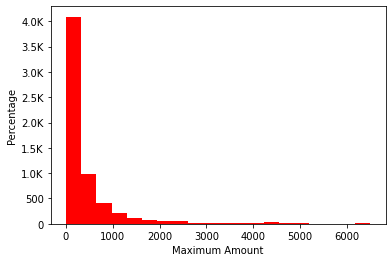

In [125]:
# histogram for 'amountMax' feature
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, df2.select('amountMax'), bins = 20, color=['red'])
plt.xlabel('Maximum Amount')
plt.ylabel('Percentage')
plt.show()

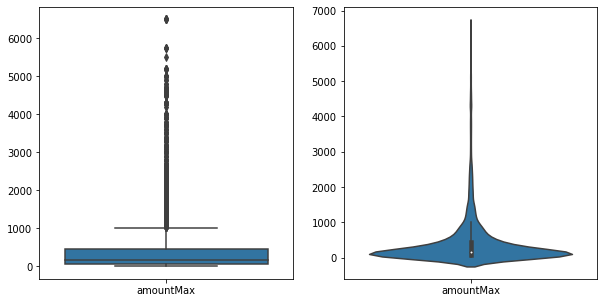

In [126]:
import seaborn as sns

x=df2.select('amountMax').toPandas()
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,2,1)
ax=sns.boxplot(data=x)

ax=fig.add_subplot(1,2,2)
ax=sns.violinplot(data=x)

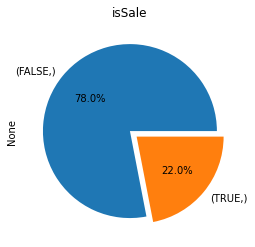

In [127]:
df2.select('isSale').toPandas().value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.title('isSale')
plt.show()

Text(0.5, 1.0, 'Scatter Plot')

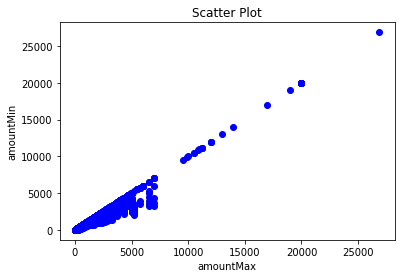

In [128]:
x1=df.toPandas()['amountMax'].values.tolist()
y1=df.toPandas()['amountMin'].values.tolist()
plt.scatter(x1,y1,color='blue')
plt.xlabel('amountMax')
plt.ylabel('amountMin')
plt.title('Scatter Plot')

['Computers', 'Electronics', 'Stereos', 'Digital Cameras', 'Auto & Tires']


[Text(0, 0.5, 'Category'), Text(0.5, 0, 'Price')]

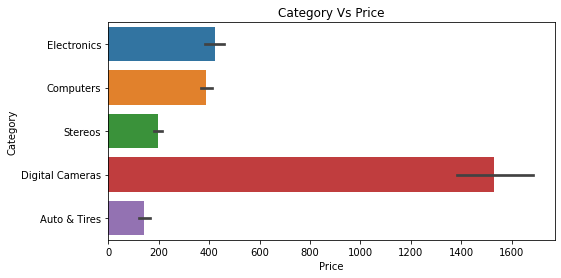

In [129]:
# grouping category with count
Category=df2.groupBy('Category').count().orderBy('count',ascending=False)
Category=Category.toPandas()
# taking top 5 categories
Category=Category[:5]
top5=list(Category.Category)
print(top5)
Category=df2.filter(df2.Category.isin(top5)).toPandas()
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x='amountMin', y='Category', data=Category).set_title('Category Vs Price')
ax.set(xlabel='Price', ylabel='Category')

['Computers', 'Electronics', 'Stereos', 'Digital Cameras', 'Auto & Tires']


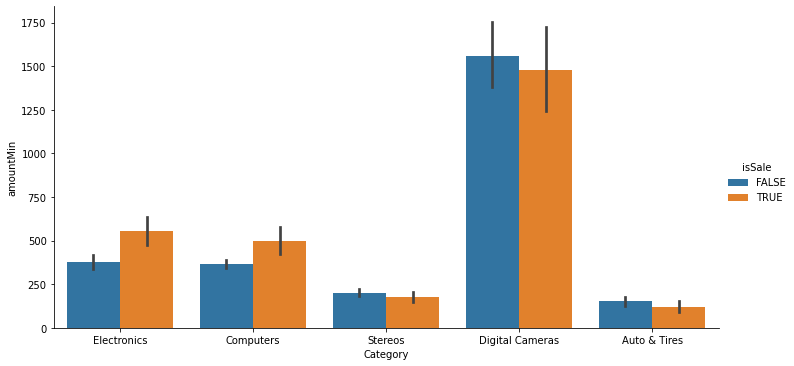

In [130]:
# grouping category with count
Category=df2.groupBy('Category').count().orderBy('count',ascending=False)
Category=Category.toPandas()
# taking top 5 categories
Category=Category[:5]
top5=list(Category.Category)
print(top5)
Category=df2.filter(df2.Category.isin(top5)).toPandas()
sns.catplot(x="Category", y="amountMin", hue="isSale", kind="bar", data=Category, aspect=2)

In [132]:
df2.columns

['amountMax',
 'amountMin',
 'availability',
 'condition',
 'dateSeen',
 'isSale',
 'merchant',
 'source',
 'asins',
 'brand',
 'dateAdded',
 'dateUpdated',
 'manufacturer',
 'name',
 'primaryCategories',
 'weight',
 'Category']

In [134]:
import pyspark
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.classification import LogisticRegression

categoricalColumns = ["availability", "condition", "merchant", "asins", "manufacturer", "name", "brand", "weight", "Category"]
stages = [] # stages in Pipeline
for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol="isSale", outputCol="label")
stages += [label_stringIdx]

numericCols = ["amountMax", "amountMin"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

partialPipeline = Pipeline().setStages(stages)
pipelineModel = partialPipeline.fit(df2)
preppedDataDF = pipelineModel.transform(df2)

# Fit model to prepped data
lrModel = LogisticRegression().fit(preppedDataDF)

In [135]:
selectedcols = ["label", "features"] + df2.columns
dataset = preppedDataDF.select(selectedcols)

In [136]:
### Randomly split data into training and test sets. set seed for reproducibility
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed=100)

In [137]:
from pyspark.ml.classification import LogisticRegression
 
# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)
 
# Train model with Training Data
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)
selected = predictions.select("label", "prediction", "probability")

In [138]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
 
# Evaluate model
evaluator = BinaryClassificationEvaluator()
print("Test AUC", evaluator.evaluate(predictions))

Test AUC 0.7728501087827784
